<a href="https://colab.research.google.com/github/eemaansheikh/Data_Science_2025/blob/main/EemaanSheikh_U3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AVERAGE SUMMER RAINFALL IN AUSTIN**





**Question**: What's the true average of rainfall during Austin's Summer months (June, July, and August)?

**Context**: My lovely peers, Lasya Sangana and Rumaan Jawad, and I were discussing the unnatural heat during September in Austin, noting how the conditions closely resembled that of summer. We recounted the abundance of beautiful rainy nights ovet this past summer. Thus the question was born, a statistical corroboration of whether this summer was truly more plentiful than the rest, or if we had only just now stopped to appreciate Austin's natural beauty.


In [ ]:
##!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

**DATA SET**

In [ ]:
data_chemshift

,0.74
0,0.38
1,2.39
2,1.35
3,0.25
4,0.77
5,5.93
6,3.38
7,0.00
8,2.01
9,0.05


In [16]:
url_chemshift = 'https://raw.githubusercontent.com/eemaansheikh/Data_Science_2025/refs/heads/main/U3_DATASet_csv.ipynb'
#I could have put the url string directly into pd.read_csv()
data_chemshift = pd.read_csv(url_chemshift)

(array([14.,  4.,  6.,  2.,  0.,  3.,  1.,  0.,  1.,  1.]),
 array([ 0.   ,  1.044,  2.088,  3.132,  4.176,  5.22 ,  6.264,  7.308,
         8.352,  9.396, 10.44 ]),
 <BarContainer object of 10 artists>)

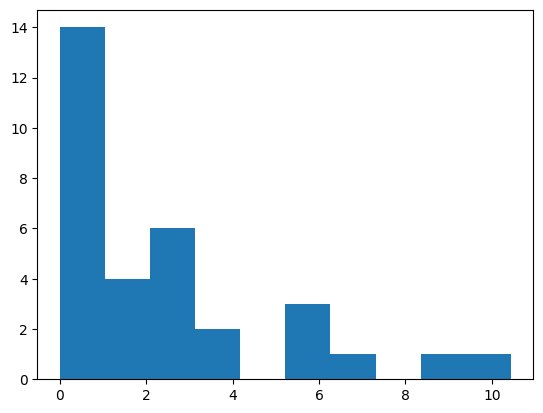

In [ ]:
plt.hist(data_chemshift)

<Axes: >

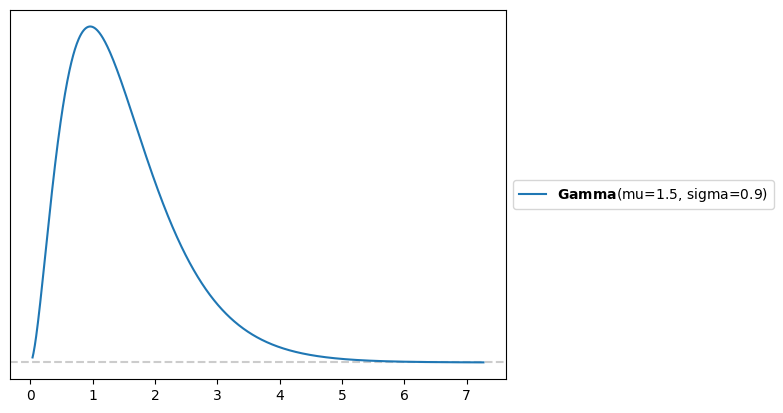

In [80]:
pz.Gamma(mu = 1.5,sigma = 0.9).plot_pdf()

**PRIORS**

<Axes: >

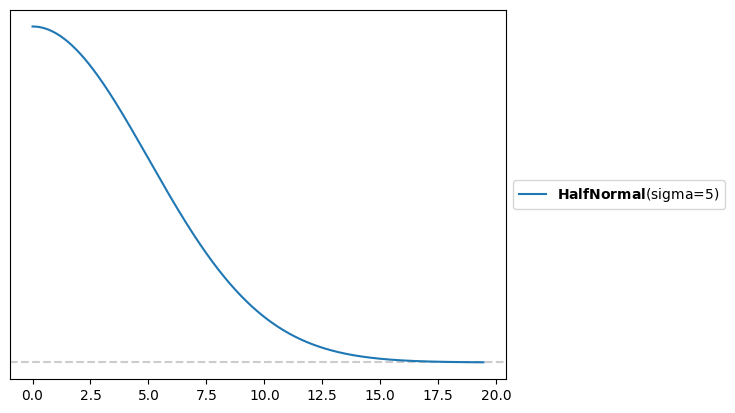

In [ ]:
pz.HalfNormal(sigma = 5).plot_pdf()


I used a HalfNormal distribution, since it is specific to positive data (and rainfall is always 0 or a positive number). Additionally, the distribution works well for a right skew, meaning that it puts more weight on smaller values.

<Axes: >

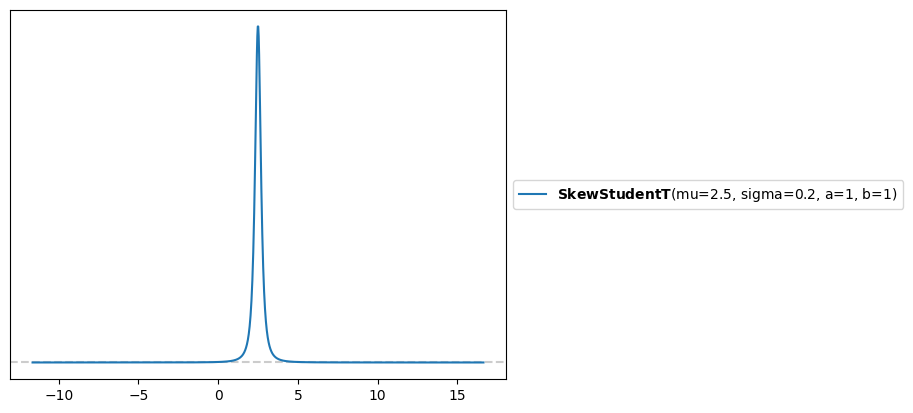

In [ ]:
pz.SkewStudentT(mu=2.5, sigma=0.20, a=1, b=1).plot_pdf()
#$\mu$ : (float) Location parameter.
#$\sigma$ : (float) Scale parameter.
#$a$ : (float) Shape parameter.
#$b$ : (float) Shape parameter


SkewStudentT Distribution works well for asymmetrical data with a heavier right skew (concentration of small numbers). It also has a more fleixble shape, since it's often used for data that may contain outliers, which accounts for the skew better than the Half Normal distribution. This distribution works for all numbers, not just positive.

**NORMAL DISTRIBUTION**

In [ ]:
#N for normal
with pm.Model() as model_chemshiftN:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    μ = pm.SkewStudentT('μ', mu=1.5, sigma=0.20, a=1, b=1)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=5)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_chemshift)
    idata_chemshiftN = pm.sample()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

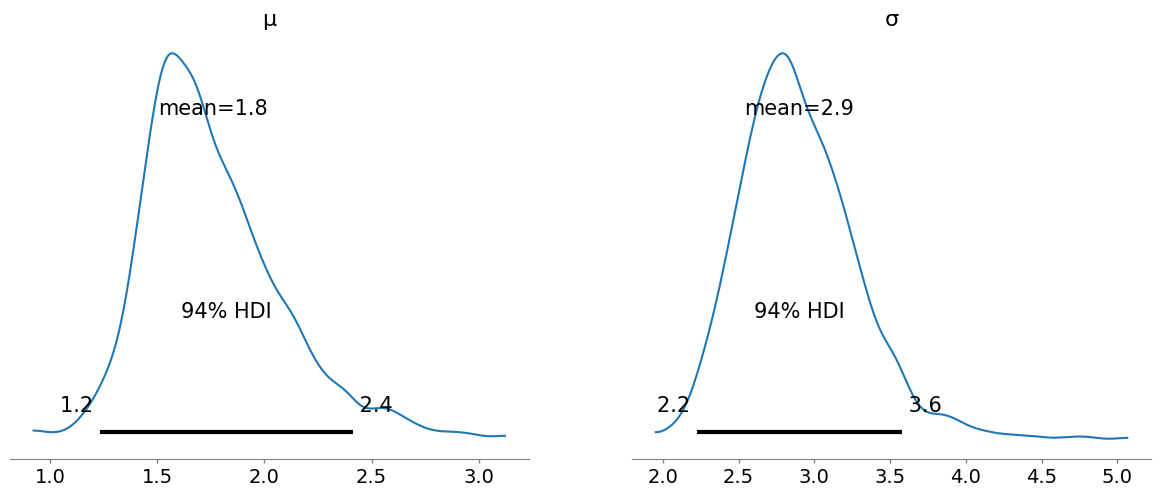

In [ ]:
az.plot_posterior(idata_chemshiftN)


In [ ]:
pm.sample_posterior_predictive(idata_chemshiftN, model=model_chemshiftN, extend_inferencedata=True)


<Axes: xlabel='Y'>

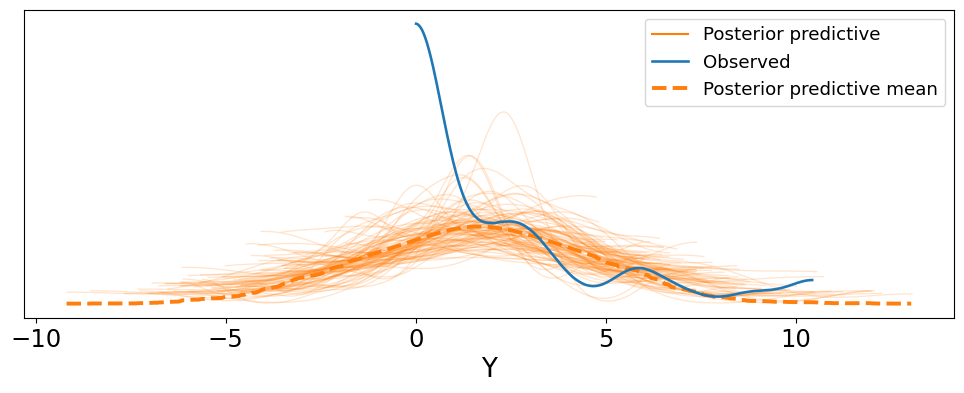

In [ ]:
az.plot_ppc(idata_chemshiftN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


**GUMBEL DISTRIBUTION**

In [ ]:
with pm.Model() as model_chemshiftN:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    μ = pm.SkewStudentT('μ', mu=1.5, sigma=0.20, a=1, b=1)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=5)

    #our fancy new likelihood, with two priors
    Y = pm.Gumbel('Y', mu = μ, beta = σ, observed=data_chemshift)
    idata_chemshiftN = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_chemshiftN, model=model_chemshiftN, extend_inferencedata=True)


<Axes: xlabel='Y'>

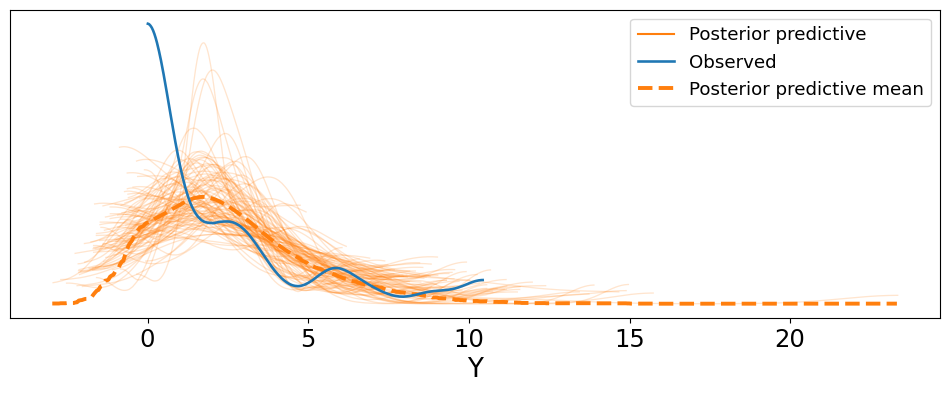

In [26]:
az.plot_ppc(idata_chemshiftN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


lowk did not eat with these choices


**DISCRETE POISSON DISTRIBUTION**

In [ ]:
with pm.Model() as model_chemshiftN:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    μ = pm.SkewStudentT('μ', mu=0.5, sigma=0.20, a=1, b=1)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=5)

    #our fancy new likelihood, with two priors
    Y = pm.Poisson('Y', mu = μ, observed=data_chemshift)
    idata_chemshiftN = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_chemshiftN, model=model_chemshiftN, extend_inferencedata=True)


<Axes: xlabel='Y'>

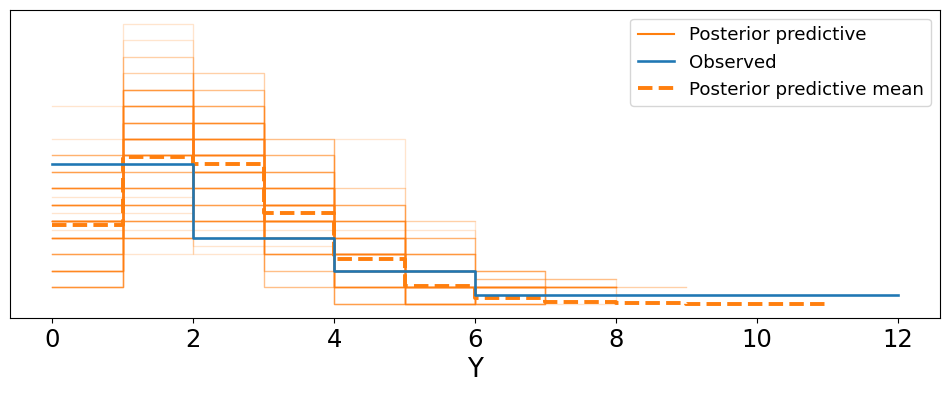

In [45]:
az.plot_ppc(idata_chemshiftN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


**GAMMA DISTRIBUTION**

In [ ]:
#N for normal
with pm.Model() as model_chemshiftN:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    μ = pm.SkewStudentT('μ', mu=1.5, sigma=0.20, a=1, b=1)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=5)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_chemshift)
    idata_chemshiftN = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_chemshiftN, model=model_chemshiftN, extend_inferencedata=True)


<Axes: xlabel='Y'>

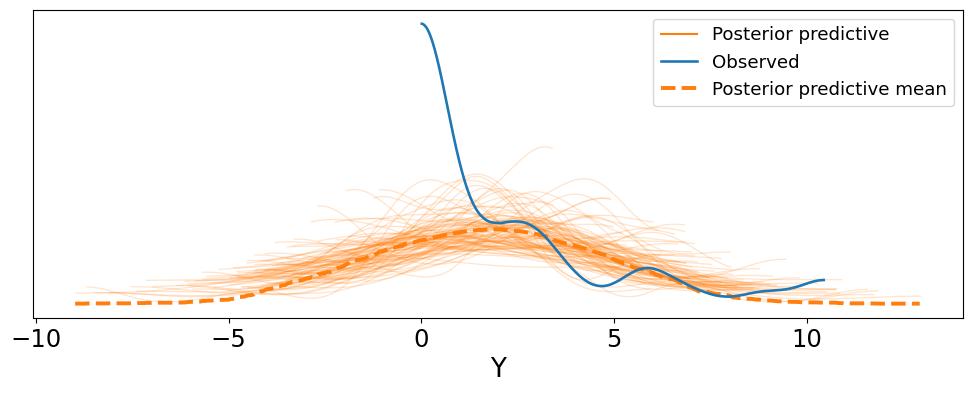

In [49]:
az.plot_ppc(idata_chemshiftN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


<Axes: xlabel='Y'>

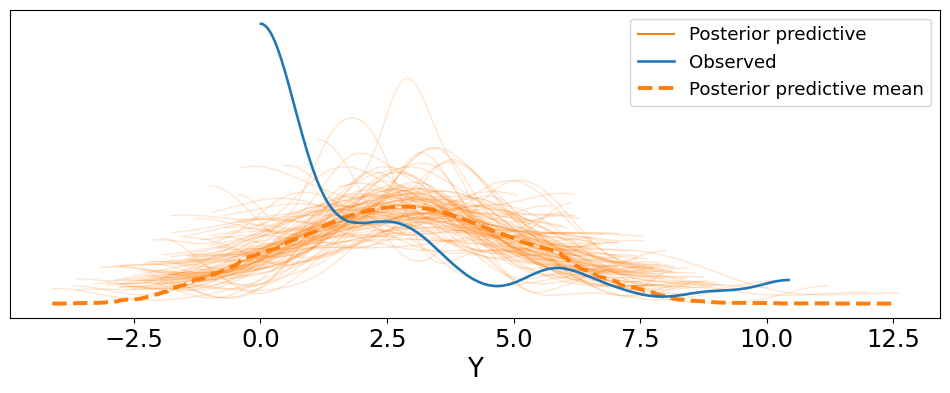

In [72]:
az.plot_ppc(idata_chemshiftN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


its just not a gamma :(